<a href="https://colab.research.google.com/github/BrendenLatham/Data_Viz/blob/main/Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 25

For assignment 25 I will be continuing the work from assignment 24, but using histograms

In [68]:
import pandas as pd
import matplotlib
import math
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


First I will create a histogram of the price

In [69]:
price = df.price
price = price.astype('float')
price.fillna(value = stat.mean(price))
for i in range(0,len(price),1):
  if price[i] == 0:
    price[i] = price[i]
  else:
    price[i] = math.log(price[i])

Text(0.5, 0, 'ln(price)')

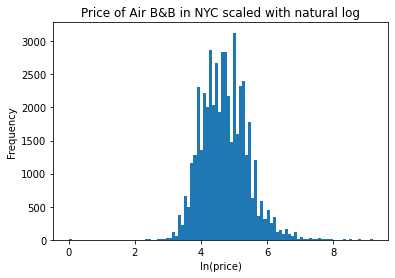

In [85]:
ax = price.plot.hist(bins = 100,title = 'Price of Air B&B in NYC Scaled With Natural Log')
ax.set_xlabel('ln(price)')

Now to create a histogram broken down by neighbourhood group

In [71]:
df2 = df
for i in range(0,len(price),1):
  if df2.price[i] == 0:
    df2.price[i] = df2.price[i]
  else:
    df2.price[i] = math.log(df2.price[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


neighbourhood_group
Bronx            AxesSubplot(0.125,0.125;0.775x0.755)
Brooklyn         AxesSubplot(0.125,0.125;0.775x0.755)
Manhattan        AxesSubplot(0.125,0.125;0.775x0.755)
Queens           AxesSubplot(0.125,0.125;0.775x0.755)
Staten Island    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

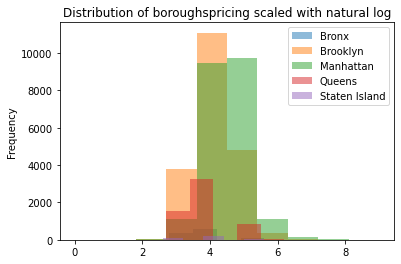

In [88]:
df2.groupby('neighbourhood_group').price.plot.hist(alpha = .5,legend = True, title = 'Distribution of Borough Pricing Scaled with Natural Log')
